# 장르별 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [2]:
movies = pd.read_csv("movie_info_final.csv")

In [3]:
movie = movies.head(58)      # 58위까지 가져온 데이터 프레임

In [4]:
movie_1000 = movie.head(29) # 천만영화 데이터 프레임(1~29)

In [5]:
movie_miss = movie[29:]     # 비천만영화 데이터 프레임(30~58)

### 1) 장르별 영화 분포 확인

In [6]:
## 장르 리스트로 추출 ##
genres = list(movies["Genre"])        # 1~200위
genre = list(movie["Genre"])          # 1~58위
genre_1000 = list(movie_1000["Genre"])# 1~28위
genre_miss = list(movie_miss["Genre"])# 29~58위

In [7]:
genres_list = []
genre_list = []
genre_1000_list = []
genre_miss_list = []

for i in genres:
    genres_list.extend(i.split(","))
for i in genre:
    genre_list.extend(i.split(","))
for i in genre_1000:
    genre_1000_list.extend(i.split(","))
for i in genre_miss:
    genre_miss_list.extend(i.split(","))

In [8]:
## 장르별 영화수 데이터 프레임 생성 ##
gdfs = pd.DataFrame(pd.value_counts(genres_list))
gdf = pd.DataFrame(pd.value_counts(genre_list))
gdf_1000 = pd.DataFrame(pd.value_counts(genre_1000_list))
gdf_miss = pd.DataFrame(pd.value_counts(genre_miss_list))

In [9]:
gdfs.columns = ["count"]
gdf.columns = ["count"]
gdf_1000.columns = ["count"]
gdf_miss.columns = ["count"]

In [10]:
gdfs.drop(["서부극(웨스턴)", "기타", "다큐멘터리", "공포(호러)"], axis=0, inplace=True) # 하나만 있는 컬럼 버리기(무의미)

Text(0.5, 1.0, '비천만 영화(29~58위)')

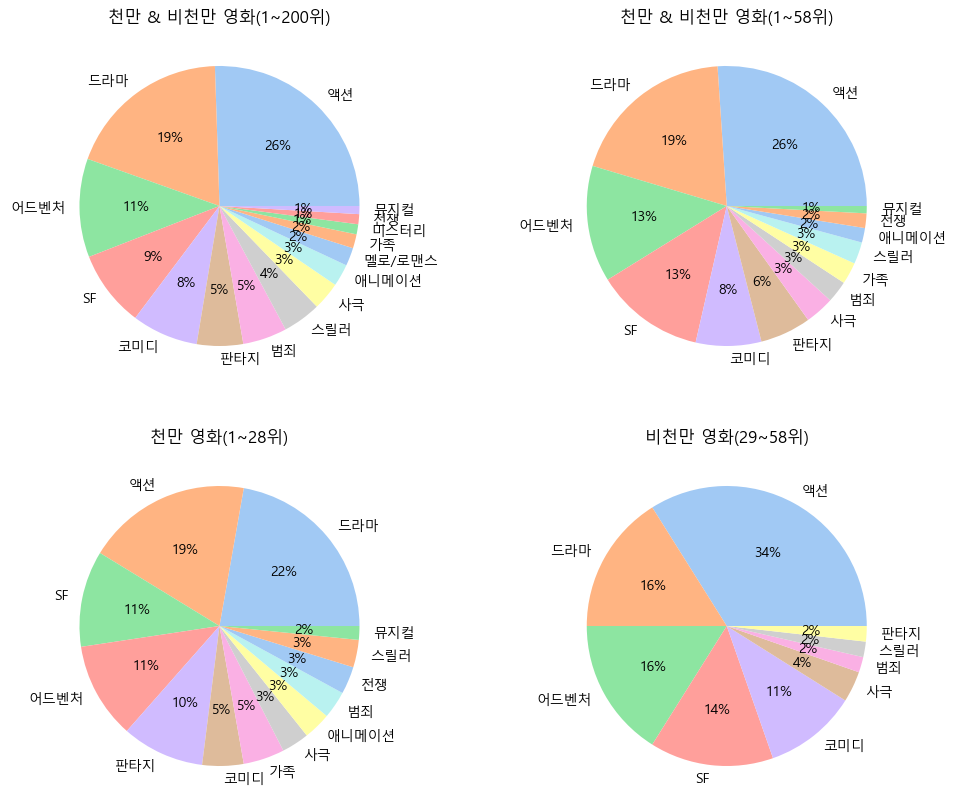

In [11]:
fig = plt.figure(figsize=(12,10)) # 그래프 위치 지정

ax1 = fig.add_subplot(2,2,1)       # 위치 지정
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
ax1.pie(gdfs["count"], 
        labels=['액션', '드라마', '어드벤처', 'SF', '코미디', '판타지', '범죄', '스릴러', '사극', '애니메이션',
               '멜로/로맨스', '가족', '미스터리', '전쟁', '뮤지컬'], colors = colors, autopct='%.0f%%')
ax2.pie(gdf["count"], 
        labels=['액션', '드라마', '어드벤처', 'SF', '코미디', '판타지', '사극', '범죄', '가족', 
                '스릴러', '애니메이션', '전쟁', '뮤지컬'], colors = colors, autopct='%.0f%%')
ax3.pie(gdf_1000["count"], 
        labels=['드라마', '액션', 'SF', '어드벤처', '판타지', '코미디', '가족', 
                '사극', '애니메이션', '범죄', '전쟁', '스릴러', '뮤지컬'], colors = colors, autopct='%.0f%%')
ax4.pie(gdf_miss["count"], 
        labels=['액션', '드라마', '어드벤처', 'SF', '코미디', '사극', '범죄', '스릴러', '판타지'], colors = colors, autopct='%.0f%%')

ax1.set_title("천만 & 비천만 영화(1~200위)")
ax2.set_title("천만 & 비천만 영화(1~58위)")
ax3.set_title("천만 영화(1~28위)")
ax4.set_title("비천만 영화(29~58위)")

    천만영화는 장르별로 다양하게 분포하고 있는데 그중 드라마, 액션, SF, 어드벤쳐, 판타지에 주로 분포하고 있다.
    비천만영화는 주로 액션, 드라마, 어드벤쳐, SF, 코미디 정도까지 주된 분포를 이루고 있다.

### 2) 장르별 누적 관객수 확인

In [12]:
g_1000 = movie_1000[["Title", "Genre", "Audi"]]
g_1000.set_index("Title", inplace=True)

In [14]:
g_miss = movie_miss[["Title", "Genre", "Audi"]]
g_miss.set_index("Title", inplace=True)

In [16]:
## 천만 비천만 영화 누적 관객수 담을 데이터 프레임 생성 ##
genre_audi = pd.DataFrame(index=pd.unique(genre_list), columns=["천만누적관객", "비천만누적관객", 
                                                                "영화수(천만)", "영화수(비천만)",
                                                                "장르별1위제목(천만)", "장르별1위제목(비천만)", 
                                                                "장르별1위관객(천만)", "장르별1위관객(비천만)"], data=0)

In [20]:
## 장르별로 천만영화 관객수 채워넣기 ##
for i in range(len(list(g_1000["Genre"]))):
    gs = list(g_1000["Genre"])[i]
    for gss in gs.split(","):
        for idx in range(len(genre_audi)):
            if gss == genre_audi.index[idx]:
                genre_audi["천만누적관객"][idx] += g_1000["Audi"][i]
                genre_audi["영화수(천만)"][idx] += 1

In [21]:
## 장르별로 비천만영화 관객수 채워넣기 ##
for i in range(len(list(g_miss["Genre"]))):
    gs = list(g_miss["Genre"])[i]
    for gss in gs.split(","):
        for idx in range(len(genre_audi)):
            if gss == genre_audi.index[idx]:
                genre_audi["비천만누적관객"][idx] += g_miss["Audi"][i]
                genre_audi["영화수(비천만)"][idx] += 1

In [22]:
## 평균 누적 관람객 수 컬럼 추가 ##
genre_audi["평균누적관객(천만)"] = (genre_audi["천만누적관객"] / genre_audi["영화수(천만)"]).round()
genre_audi["평균누적관객(비천만)"] = (genre_audi["비천만누적관객"] / genre_audi["영화수(비천만)"]).round()

In [23]:
genre_audi.fillna(0, inplace=True)

In [24]:
genre_audi["평균누적관객(천만)"] = genre_audi["평균누적관객(천만)"].astype(int)
genre_audi["평균누적관객(비천만)"] = genre_audi["평균누적관객(비천만)"].astype(int)

In [26]:
genre_audi

,천만누적관객,비천만누적관객,영화수(천만),영화수(비천만),장르별1위제목(천만),장르별1위제목(비천만),장르별1위관객(천만),장르별1위관객(비천만),평균누적관객(천만),평균누적관객(비천만)
사극,29939981,16606439,2,2,0,0,0,0,14969990,8303220
액션,152164876,150692608,12,19,0,0,0,0,12680406,7931190
코미디,39383533,50779812,3,6,0,0,0,0,13127844,8463302
판타지,71533309,7855474,6,1,0,0,0,0,11922218,7855474
드라마,170596236,73653890,14,9,0,0,0,0,12185445,8183766
SF,81116401,64664688,7,8,0,0,0,0,11588057,8083086
애니메이션,24055719,0,2,0,0,0,0,0,12027860,0
어드벤처,80306971,71336952,7,9,0,0,0,0,11472424,7926328
범죄,25678116,9707581,2,1,0,0,0,0,12839058,9707581
가족,34020378,0,3,0,0,0,0,0,11340126,0


In [27]:
genre_audi.drop(["뮤지컬"], axis=0, inplace=True)

In [28]:
genre_audi.to_csv("genre_audi.csv", encoding="utf-8")

Text(0.5, 0, '장르별 평균 누적 관객수')

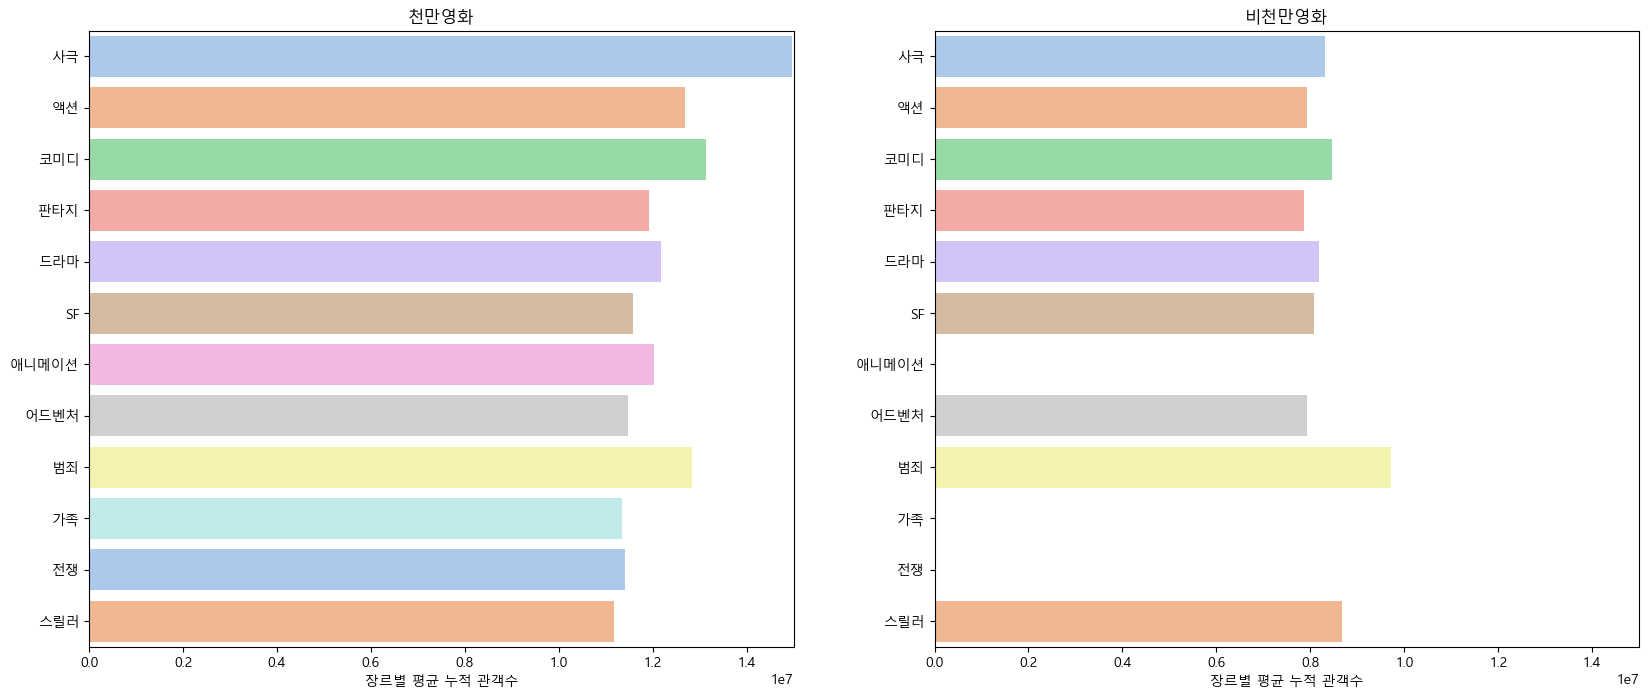

In [45]:
fig = plt.figure(figsize=(20,8)) # 그래프 위치 지정

ax1 = fig.add_subplot(121)       # 위치 지정
ax2 = fig.add_subplot(122)

ax1.set_xlim(0, 1.5e7)             # 축 사이즈 지정
ax2.set_xlim(0, 1.5e7)

sns.barplot(x="평균누적관객(천만)", y=genre_audi.index, data=genre_audi, ax=ax1, palette="pastel")
sns.barplot(x="평균누적관객(비천만)", y=genre_audi.index, data=genre_audi, ax=ax2, palette="pastel")

ax1.set_title("천만영화")
ax2.set_title("비천만영화")
ax1.set_xlabel("장르별 평균 누적 관객수")
ax2.set_xlabel("장르별 평균 누적 관객수")

    공통적으로 사극영화에 누적 관람객 수가 돋보적으로 많다.
    -> 관객수로만 분석한다면 천만영화를 노리기 위해선 사극장르를 택하는게 좋아보인다.
       반면 장르 분포를 보면 액션이 월등히 많은데 관객수로 보면 사극이 더 많다.
    
    -> 주류 장르는 액션인데 관객수는 사극이 더 많은 기묘한 현상(영화수에 비해 관객수가 넘 많음).
        - 명량이나 관상같이 천만에 든 영화들의 다양한 요인들을 분석한 결과를 도입해서 이런 요인들이 있었기에 
          액션을 뛰어넘어 사극이 이런 많은 관람객수를 달성할 수 있었다? 이런 식으로 끌어가야 할 것 같다.

In [30]:
movie_genre = list(genre_audi.index)

In [31]:
genre_audi = genre_audi.astype({'장르별1위제목(천만)': str, '장르별1위제목(비천만)': str})

In [33]:
for i in range(len(movie_1000)):
    for j in range(len(movie_genre)):
        gg = []
        if genre_audi["장르별1위제목(천만)"][j] == "0":
            gg.extend(movie_1000["Genre"][i].split(","))
            for k in range(len(gg)):
                if movie_genre[j] == gg[k]:
                    genre_audi["장르별1위제목(천만)"][j] = movie_1000["Title"][i]
                    genre_audi["장르별1위관객(천만)"][j] = movie_1000["Audi"][i]

In [34]:
for i in range(29, 58):
    for j in range(len(movie_genre)):
        gg = []
        if genre_audi["장르별1위제목(비천만)"][j] == "0":
            gg.extend(movie_miss["Genre"][i].split(","))
            for k in range(len(gg)):
                if movie_genre[j] == gg[k]:
                    genre_audi["장르별1위제목(비천만)"][j] = movie_miss["Title"][i]
                    genre_audi["장르별1위관객(비천만)"][j] = movie_miss["Audi"][i]

C:\Users\eunga\AppData\Local\Temp\ipykernel_20040\2763374400.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_audi["장르별1위제목(비천만)"][j] = movie_miss["Title"][i]
C:\Users\eunga\AppData\Local\Temp\ipykernel_20040\2763374400.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_audi["장르별1위관객(비천만)"][j] = movie_miss["Audi"][i]


In [35]:
genre_audi

,천만누적관객,비천만누적관객,영화수(천만),영화수(비천만),장르별1위제목(천만),장르별1위제목(비천만),장르별1위관객(천만),장르별1위관객(비천만),평균누적관객(천만),평균누적관객(비천만)
사극,29939981,16606439,2,2,명량,관상,17615919,9135806,14969990,8303220
액션,152164876,150692608,12,19,명량,엑시트,17615919,9426960,12680406,7931190
코미디,39383533,50779812,3,6,극한직업,검사외전,16266338,9707581,13127844,8463302
판타지,71533309,7855474,6,1,신과함께-죄와 벌,디워,14414658,7855474,11922218,7855474
드라마,170596236,73653890,14,9,신과함께-죄와 벌,보헤미안 랩소디,14414658,9948386,12185445,8183766
SF,81116401,64664688,7,8,어벤져스- 엔드게임,설국열차,13977602,9353799,11588057,8083086
애니메이션,24055719,0,2,0,겨울왕국 2,0,13750668,0,12027860,0
어드벤처,80306971,71336952,7,9,아바타,아이언맨 3,13338863,9001679,11472424,7926328
범죄,25678116,9707581,2,1,도둑들,검사외전,12984701,9707581,12839058,9707581
가족,34020378,0,3,0,알라딘,0,12797927,0,11340126,0


In [105]:
genre_audi.to_csv("genre_audi.csv", encoding="utf-8")

### 3) 각 장르별 1, 2, 3위

In [81]:
## 각 장르별 1,2,3위 담을 데이터 프레임 생성 ##
genre_1000 = pd.DataFrame(index=pd.unique(genre_list), columns=["1위", "2위", "3위"], data="-")
genre_miss = pd.DataFrame(index=pd.unique(genre_list), columns=["1위", "2위", "3위"], data="-")

In [82]:
## 천만영화 1, 2, 3위 담기 ##
for i in range(len(movie_1000)):
    for j in range(len(movie_genre)):
        gg = []
        if genre_1000["1위"][j] == "-":
            gg.extend(movie_1000["Genre"][i].split(","))
            for k in range(len(gg)):
                if movie_genre[j] == gg[k]:
                    genre_1000["1위"][j] = movie_1000["Title"][i]
        if genre_1000["2위"][j] == "-" and genre_1000["1위"][j] != movie_1000["Title"][i]:
            gg.extend(movie_1000["Genre"][i].split(","))
            for k in range(len(gg)):
                if movie_genre[j] == gg[k]:
                    genre_1000["2위"][j] = movie_1000["Title"][i]
        if genre_1000["3위"][j] == "-" and genre_1000["1위"][j] != movie_1000["Title"][i] and genre_1000["2위"][j] != movie_1000["Title"][i]:
            gg.extend(movie_1000["Genre"][i].split(","))
            for k in range(len(gg)):
                if movie_genre[j] == gg[k]:
                    genre_1000["3위"][j] = movie_1000["Title"][i]
                    

In [92]:
genre_1000.drop(["뮤지컬"], axis=0, inplace=True)

In [93]:
genre_1000["영화수"] = genre_audi["영화수(천만)"]

In [101]:
genre_1000.loc["sum"]=genre_1000["영화수"].sum()

In [102]:
genre_1000

,1위,2위,3위,영화수
사극,명량,"광해, 왕이 된 남자",-,2
액션,명량,어벤져스- 엔드게임,베테랑,12
코미디,극한직업,7번방의 선물,겨울왕국,3
판타지,신과함께-죄와 벌,알라딘,신과함께-인과 연,6
드라마,신과함께-죄와 벌,국제시장,베테랑,14
SF,어벤져스- 엔드게임,아바타,어벤져스- 인피니티 워,7
애니메이션,겨울왕국 2,겨울왕국,-,2
어드벤처,아바타,알라딘,해운대,7
범죄,도둑들,범죄도시2,-,2
가족,알라딘,괴물,겨울왕국,3


In [85]:
## 비천만 영화 1, 2, 3위 담기 ##
for i in range(29, 58):
    for j in range(len(movie_genre)):
        gg = []
        if genre_miss["1위"][j] == "-":
            gg.extend(movie_miss["Genre"][i].split(","))
            for k in range(len(gg)):
                if movie_genre[j] == gg[k]:
                    genre_miss["1위"][j] = movie_miss["Title"][i]
        if genre_miss["2위"][j] == "-" and genre_miss["1위"][j] != movie_miss["Title"][i]:
            gg.extend(movie_miss["Genre"][i].split(","))
            for k in range(len(gg)):
                if movie_genre[j] == gg[k]:
                    genre_miss["2위"][j] = movie_miss["Title"][i]
        if genre_miss["3위"][j] == "-" and genre_miss["1위"][j] != movie_miss["Title"][i] and genre_miss["2위"][j] != movie_miss["Title"][i]:
            gg.extend(movie_miss["Genre"][i].split(","))
            for k in range(len(gg)):
                if movie_genre[j] == gg[k]:
                    genre_miss["3위"][j] = movie_miss["Title"][i]

In [97]:
genre_miss.drop(["뮤지컬"], axis=0, inplace=True)

In [99]:
genre_miss["영화수"] = genre_audi["영화수(비천만)"]

In [100]:
genre_miss

,1위,2위,3위,영화수
사극,관상,최종병기 활,-,2
액션,엑시트,설국열차,아이언맨 3,19
코미디,검사외전,엑시트,과속스캔들,6
판타지,디워,-,-,1
드라마,보헤미안 랩소디,관상,수상한 그녀,9
SF,설국열차,아이언맨 3,캡틴 아메리카- 시빌 워,8
애니메이션,-,-,-,0
어드벤처,아이언맨 3,해적- 바다로 간 산적,백두산,9
범죄,검사외전,-,-,1
가족,-,-,-,0


In [18]:
genre_audi = pd.read_csv("genre_audi.csv")

In [12]:
## 컬럼 정리 ##
genre_audi = genre_audi.rename(columns={"Unnamed: 0":"장르"})
genre_audi.set_index("장르", inplace=True)

In [15]:
genre_audi.to_csv("genre_audi.csv", encoding="utf-8")

### 4) 분포도 확인

In [20]:
genre_audi = pd.read_csv("genre2.csv")

In [48]:
genre_audi = genre_audi[genre_audi["genre"]!="뮤지컬"]

Text(0.5, 1.0, '1~58위 영화 장르별 분포도')

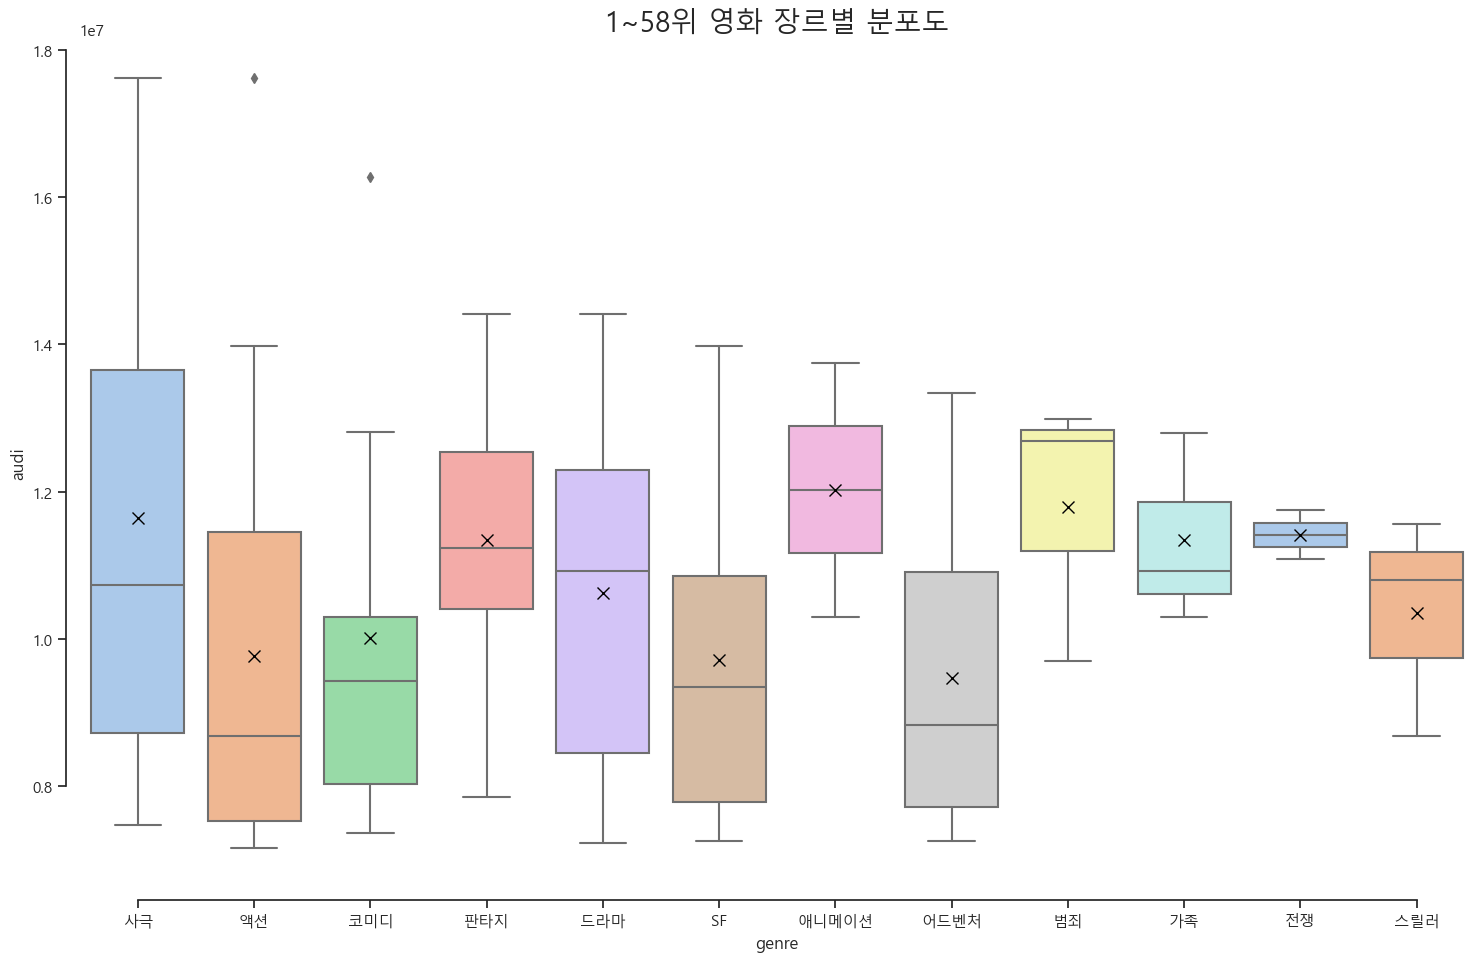

In [90]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=genre_audi, x="genre", y='audi', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('1~58위 영화 장르별 분포도', size=20)

In [2]:
genre_audi_200 = pd.read_csv("genre.csv")

In [4]:
genre_audi_200 = genre_audi_200[genre_audi_200["genre"]!="서부극(웨스턴)"]
genre_audi_200 = genre_audi_200[genre_audi_200["genre"]!="기타"]
genre_audi_200 = genre_audi_200[genre_audi_200["genre"]!="다큐멘터리"]
genre_audi_200 = genre_audi_200[genre_audi_200["genre"]!="공포(호러)"]

Text(0.5, 1.0, '1~200위 영화 장르별 분포도')

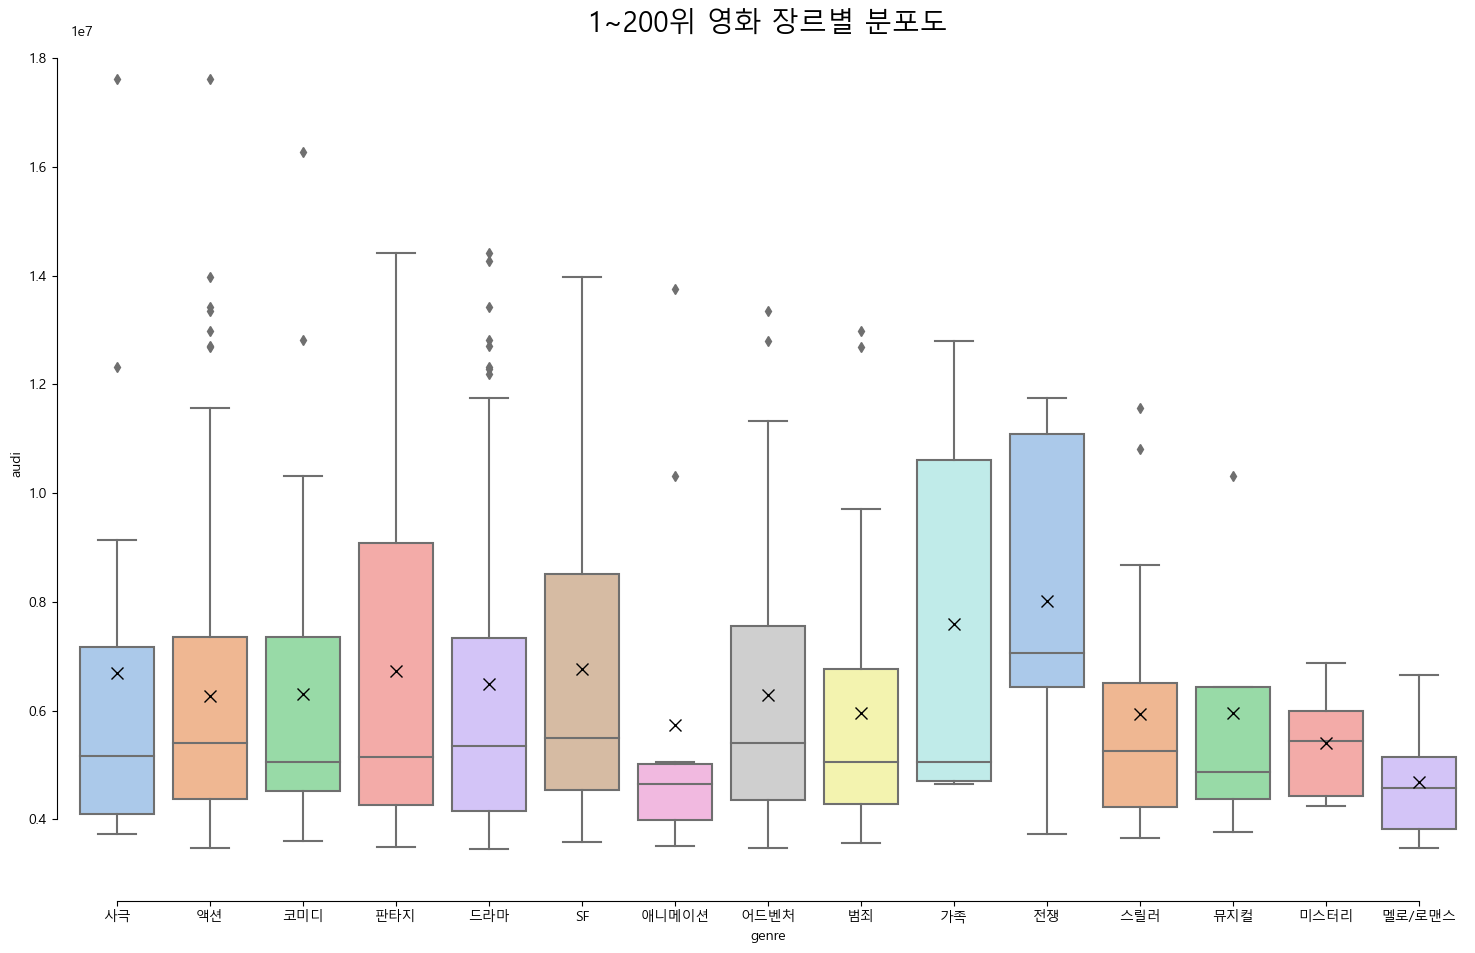

In [5]:
fig = plt.figure(figsize=(18,11))

p = sns.boxplot(data=genre_audi_200, x="genre", y='audi', palette="pastel", showmeans=True,
               meanprops={"marker":"x", "markerfacecolor":"black", "markeredgecolor":"black", "markersize":"9"})
p = sns.despine(offset=10, trim=True)

plt.title('1~200위 영화 장르별 분포도', size=20)